In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabula import read_pdf

#df = pd.read_excel(r'C:\Users\user\Downloads\PythonWorkspace\iPythonNotebook\demo.xlsx', sheet_name='Sheet1')
#df = read_pdf(r'C:\Users\user\Downloads\git\DataScience\PythonWorkspace\Assignment\EdaAssignment\Dataset.pdf')
df = pd.read_csv(r'C:\Users\user\Downloads\git\DataScience\PythonWorkspace\Assignment\EdaAssignment\Datasetcsv.csv')
df


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


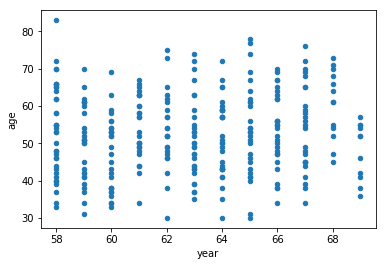

In [2]:
#2D scatter plot
df.plot(kind='scatter',x='year',y='age')
plt.show()

#Observations
#from the following figure, we can conclude the average patient's ages that belongs to cancer as well as the year in which they have gone through the cancer treatment


In [25]:
z=df[df['year']==58]
z

,age,year,nodes,status
5,33,58,10,1
9,34,58,30,1
20,37,58,0,1
37,39,58,0,1
40,40,58,2,1
41,40,58,0,1
46,41,58,0,1
55,42,58,0,1
62,43,58,52,2
74,44,58,9,2


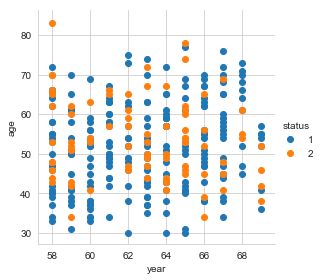

1    225
2     81
Name: status, dtype: int64

In [28]:
#using seaborn
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="status",height=4)\
   .map(plt.scatter,"year","age")\
   .add_legend();
plt.show()
df['status'].value_counts()

#Observations:
# 1. out of total patients there are 225 patients having status 1 and 81 patients having status 2
# 2. here we can also identify the approax result of the ages of patient with years having success status i.e 1 or 2 (since the dots of status 1 and 2 are overlapping so we can't get the accurate result)   

#Note: According to habermans's file, status 1 means the patient survived 5yrs or longer but the patient having status 2 means the patient died within 5year

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv(r'C:\Users\user\Downloads\git\DataScience\PythonWorkspace\Assignment\EdaAssignment\Datasetcsv.csv')
df.head()

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(df['status'].unique())):
    name = df['status'].unique()[i]
    color = colors[i]
    x = df[ df['status'] == name ]['age']
    y = df[ df['status'] == name ]['year']
    z = df[ df['status'] == name ]['nodes']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-iris', validate=False)

url = py.plot(fig, filename='Datasetcsv', validate=False)

#Sir I am unable to do with 3d scatter plot as they are asking for username

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


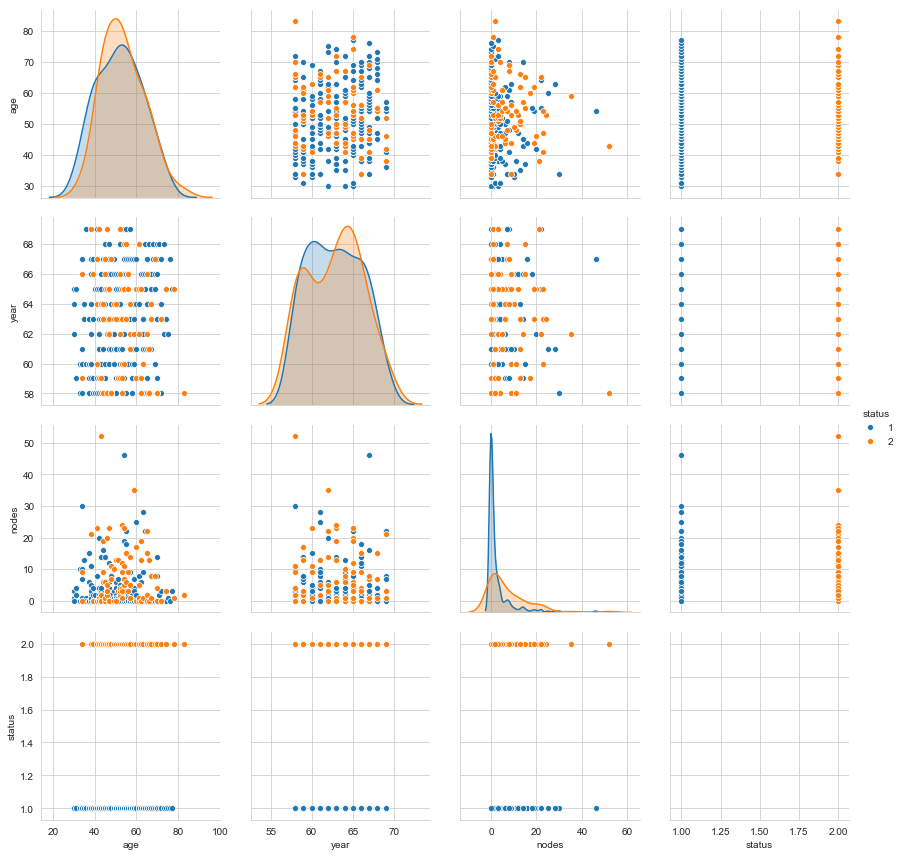

In [5]:
#using pair plot
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue="status",height=3)
plt.show()

#Obsevations:
 # Here are some figures having coordinate axis names (status,age),(status,year),(status,nodes),(age,status),(year,status),(nodes,status) through which we can create models using if-else condition
 # Also the figure having coordinate axis name (nodes,nodes) is suitable for finding pdf(probability density function) of status 1 and other figures with pdf are overlapping.   

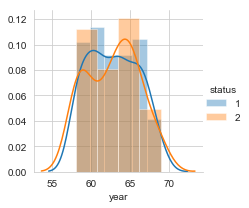

In [6]:
sns.FacetGrid(df,hue="status",height=3).map(sns.distplot,"year").add_legend()
plt.show()

#Observations
##From the following figure, we can seee that, on the year 60 the success status i.e 1 is high but the year between 64 and 65 the success status is 2 i.e the patient died more within these period according to habermans's file. 

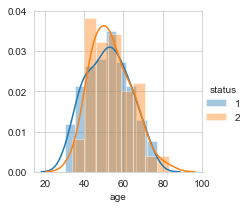

In [7]:
sns.FacetGrid(df,hue="status",height=3).map(sns.distplot,"age").add_legend()
plt.show()

#Observations
##From the following figure, we can conclude that patients belonging to the age 45 to 50 have less success status i.e 2(patient have died more between these ages)

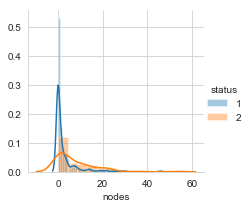

In [8]:
sns.FacetGrid(df,hue="status",height=3).map(sns.distplot,"nodes").add_legend()
plt.show()

#Observations
##From the following figure, we can conclude that the patient with nodes 0 is having more success status 1